<a href="https://colab.research.google.com/github/jscortesg/Uniandes-MetodosComputacionales-2022-01/blob/main/Semana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integración numérica

Suma de Riemann 

Por definición de integral definida en $a\leq x \leq b$, 

\begin{equation}
\int_{a}^{b}f(x)dx = \lim_{h\rightarrow 0}\left[h\sum_{i=1}^{(b-a)/h}f(x_{i})\right]
\end{equation}

Aproximación para $N$ áreas debajo de la curva (con la misma base $h$):

\begin{align}
&\int_{a}^{b}f(x)dx \approx h\sum_{i=1}^{N}f(x_{i}), \\
&\text{Suma de Riemann Derecha}
\end{align}

o también, 

\begin{align}
&\int_{a}^{b}f(x)dx \approx h\sum_{i=0}^{N-1}f(x_{i}), \\
&\text{Suma de Riemann Izquierda}
\end{align}

donde $h = \frac{b-a}{N-1}$

Error en la aproximación:

$\int_{a}^{b}f(x)dx = \sum_{i}\int_{x_{i}}^{x_{i+1}}f(x)dx$.

$f(x) = f(x_{i})+f^{'}(x_{i})(x-x_{i})+\frac{f^{''}(x_{i})}{2!}(x-x_{i})^{2}+\cdots$

Entonces,

$\int_{x_{i}}^{x_{i+1}}f(x)dx = f(x_{i})\int_{x_{i}}^{x_{i+1}}dx + f^{'}(x_{i})\int_{x_{i}}^{x_{i+1}}(x-x_{i})dx+\int_{x_{i}}^{x_{i+1}}\mathcal{O}(x_{i}-x_{i+1})^{2}dx$

En este caso, $h = x_{i+1}-x_{i}$. Además, $\int_{x_{i}}^{x_{i+1}}(x-x_{i})dx=\frac{(x_{i+1}-x_{i})^{2}}{2}$. De este modo,

\begin{equation}
\int_{x_{i}}^{x_{i+1}}f(x)dx = hf(x_{i})+\frac{h^{2}}{2}f^{'}(x_{i}).
\end{equation}

En resumen,

\begin{equation}
\int_{a}^{b}f(x)dx = h\sum_{i}\left[f(x_{i})+\frac{h}{2}f^{'}(x_{i})+\cdots\right]
\end{equation}

El error es de orden $h$ ($\mathcal{O}(h)$)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

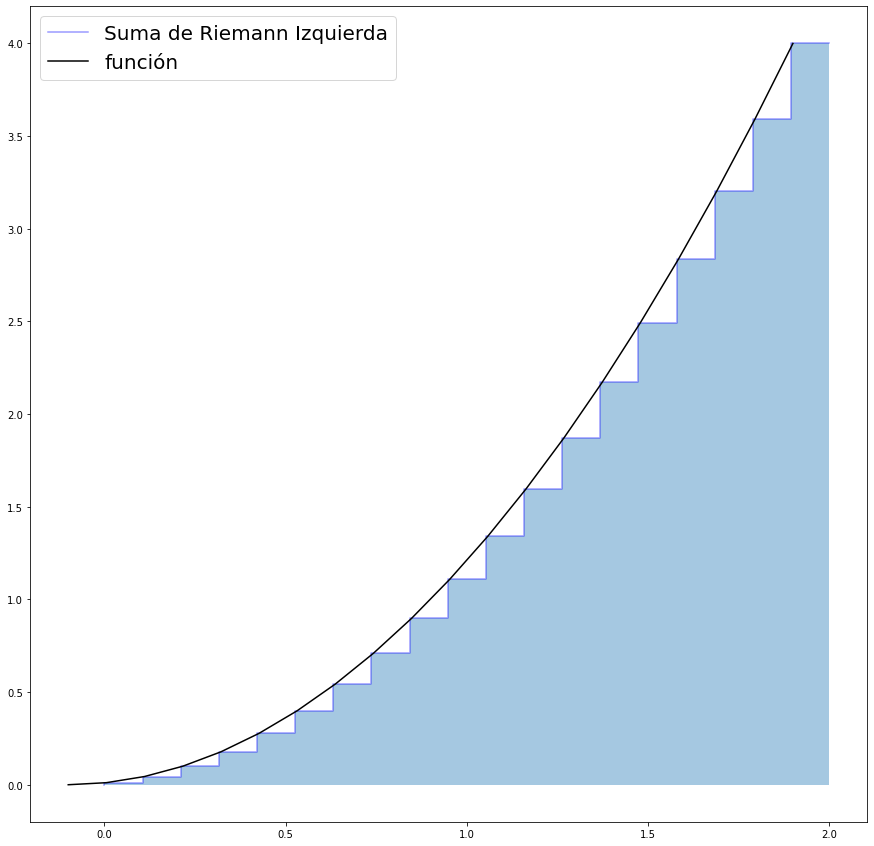

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

x = np.linspace(0,2,20)

y = pow(x,2)

ax.plot(x, y, c='blue', alpha=0.4, drawstyle="steps", label='Suma de Riemann Izquierda')
ax.plot(x-0.1, y, c='black', label='función')
ax.fill_between(x, y, step="pre", alpha=0.4)
leg = ax.legend(prop={"size":20})

Dibujo área bajo la curva: https://www.tutorialspoint.com/how-to-fill-the-area-under-a-step-curve-using-pyplot-matplotlib

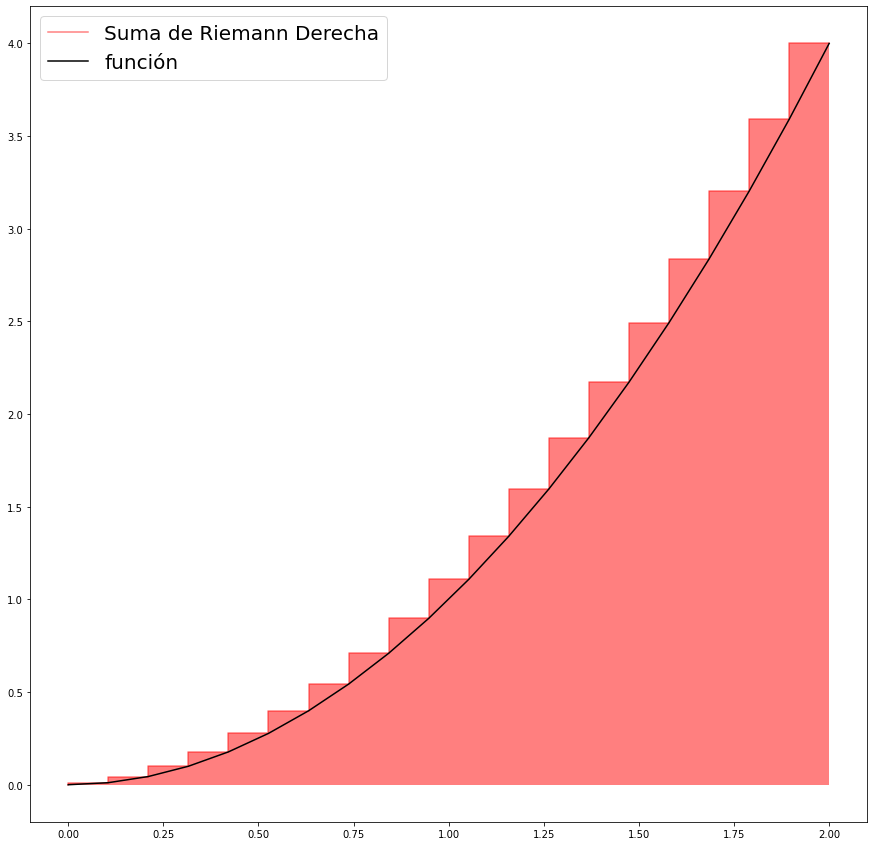

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

x = np.linspace(0,2,20)

y = pow(x,2)

ax.plot(x, y, c='red', alpha=0.5, drawstyle="steps", label='Suma de Riemann Derecha')
ax.plot(x, y, c='black', label='función')
ax.fill_between(x, y, step="pre", alpha=0.5, facecolor='red')
leg = ax.legend(prop={"size":20})

In [ ]:
a = 0
b = np.pi
N = 11
h = (b - a)/(N-1)
x = np.linspace(a, b, N)
f = np.sin(x)

I_riemannL = h * sum(f[:N-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

print("Integral Riemann izquierda = ", I_riemannL)
print("Error integral Riemann izquierda = ",err_riemannL)

print("Integral Riemann derecha = ", I_riemannR)
print("Error integral Riemman derecha = ", err_riemannR)

Integral Riemann izquierda =  1.9835235375094546
Error integral Riemann izquierda =  0.01647646249054535
Integral Riemann derecha =  1.9835235375094546
Error integral Riemman derecha =  0.01647646249054535


In [ ]:
liserror_L = []

a = 0
b = np.pi

Nint = np.arange(2,21,1)

for n in Nint:

  h = (b - a)/(N-1)

  liserror_L.append(abs(2-h * sum(f[:n-1])))

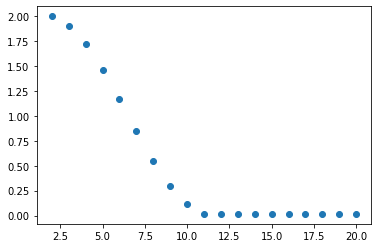

In [ ]:
plt.figure()
plt.scatter(Nint,liserror_L)

#Ejercicio:

Integrar numéricamente la función

\begin{equation}
y(x) = e^{-x}\sin x
\end{equation}

en el intervalo $0\leq x \leq \pi/2$ para $N=11$. Obtener el respectivo error.

Tomar un intervalo de particiones $2\leq N \leq 25$ y comparar con el resultado analítico para obtener los respectivos errores.

Valor de la integral: $\int_{0}^{\pi/2}e^{-x}\sin(x)dx = 0.396$

In [ ]:
a = 0
b = np.pi/2
N = 11
h = (b - a)/(N-1)
x = np.linspace(a, b, N)
f = np.exp(-x)*np.sin(x)

I_riemannL = h * sum(f[:N-1])
err_riemannL = 0.396 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 0.396 - I_riemannR

print("Integral Riemann izquierda = ", I_riemannL)
print("Error integral Riemann izquierda = ",err_riemannL)

print("Integral Riemann derecha = ", I_riemannR)
print("Error integral Riemman derecha = ", err_riemannR)

Integral Riemann izquierda =  0.3772511272242721
Error integral Riemann izquierda =  0.0187488727757279
Integral Riemann derecha =  0.4099047747190177
Error integral Riemman derecha =  -0.013904774719017687


In [ ]:
liserr_L1 = []

a = 0
b = np.pi/2

Nint1 = np.arange(2,26,1)

for n in Nint1:

  h = (b - a)/(N-1)

  liserr_L1.append(abs(0.396 - h * sum(f[:n-1])))

In [ ]:
len(liserr_L1), len(Nint1)

(24, 24)

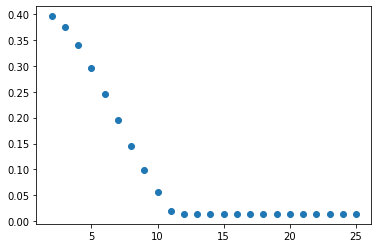

In [ ]:
plt.figure()
plt.scatter(Nint1,liserr_L1)

#Regla del trapezoide y Regla de Simpson

Regla del trapezoide:

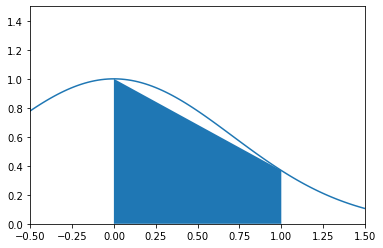

In [ ]:
x = np.linspace(-0.5,1.5,100)
y = np.exp(-x**2)
plt.plot(x,y)

x0 = 0; x1 = 1;
y0 = np.exp(-x0**2); y1 = np.exp(-x1**2);
plt.fill_between([x0,x1],[y0,y1])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

Tomado de https://personal.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/

Área de un trapezoide: $A = \frac{\text{base mayor + base menor}}{2}*\text{altura}$


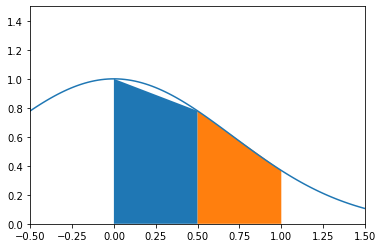

In [ ]:
x = np.linspace(-0.5,1.5,100)
y = np.exp(-x**2)
plt.plot(x,y)

x0 = 0; x1 = 0.5; x2 = 1;
y0 = np.exp(-x0**2); y1 = np.exp(-x1**2); y2 = np.exp(-x2**2);
plt.fill_between([x0,x1],[y0,y1])
plt.fill_between([x1,x2],[y1,y2])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

Para cada trapecio, base menor = $y(x_{i})$, base mayor = $y(x_{i+1})$, altura = $h = x_{i+1} - x_{i}$

Una sola área: $A_{i} = \frac{f(x_{i})+f(x_{i+1})}{2}*h$.

Todas las áreas:

\begin{equation}
\int_{a}^{b}f(x)dx \approx \frac{h}{2}\sum_{i=0}^{N-1}\left[f(x_{i})+f(x_{i+1})\right].
\end{equation}

Error en la regla del trapecio:

$\int_{a}^{b}f(x)dx = \sum_{i}\int_{x_{i}}^{x_{i+1}}f(x)dx$.

$f(x) \approx f(y_{i})+f^{'}(y_{i})(x-y_{i})+\frac{f^{''}(y_{i})}{2}(x-y_{i})^{2}+\cdots$, $y_{i} = \frac{x_{i}+x_{i+1}}{2}$.

Reemplazando los límites del intervalo,

$x_{i} - y_{i} = x_{i} - \frac{x_{i}+x_{i+1}}{2} = \frac{x_{i}-x_{i+1}}{2} = -\frac{h}{2}$,

$x_{i+1}-y_{i} = x_{i+1} - \frac{x_{i}+x_{i+1}}{2} = \frac{x_{i+1}-x_{i}}{2} = \frac{h}{2}$.

$\int_{x_{i}}^{x_{i+1}}f(x)dx = \int_{x_{i}}^{x_{i+1}}f(y)dx + \int_{x_{i}}^{x_{i+1}}f^{'}(y)(x-y_{i})dx+\frac{1}{2}\int_{x_{i}}^{x_{i+1}}f^{''}(y_{i})(x-y_{i})^{2}+\cdots$ 

$\int_{x_{i}}^{x_{i+1}}(x-y_{i})dx = \frac{1}{2}\left. (x-y_{i})^{2}\right|_{x_{i}}^{x_{i+1}} = \frac{1}{8}\left[(x_{i+1}-x_{i})^{2}-(x_{i}-x_{i+1})^{2}\right] = \frac{1}{8}(h-h)=0$.

Para un solo intervalo,

$\int_{x_{i}}^{x_{i+1}}f(x)dx\approx hf(y_{i})+\frac{f^{''}(y_{i})}{2}\int_{x_{i}}^{x_{i+1}}(x-y_{i})^{2}dx = hf(y_{i})+\mathcal{O}(h^{3})$.

Para todo el intervalo,

$\int_{a}^{b}f(x)dx\approx h\sum_{i=0}^{N-1}\left[f(y_{i})+\mathcal{O}(h^{2})\right].$

Pero

\begin{align}
f(x_{i}) &\approx f(y_{i})+f^{'}(y_{i})(x_{i}-y_{i})+\frac{f^{''}(y_{i})}{2}(x_{i}-y_{i})^{2}+\cdots \\
&= f(y_{i}) - \frac{h}{2}f^{'}(y_{i}) + \frac{h^{2}}{8}f^{''}(y_{i})+\cdots \\
f(x_{i+1})&\approx f(y_{i})+f^{'}(y_{i})(x_{i+1}-y_{i})+\frac{f^{''}(y_{i})}{2}(x_{i+1}-y_{i})^{2}+\cdots \\
&= f(y_{i}) + \frac{h}{2}f^{'}(y_{i}) + \frac{h^{2}}{8}f^{''}(y_{i})+\cdots\end{align}

$f(y_{i})\approx \frac{f(x_{i})+f(x_{i+1})}{2}+\mathcal{O}(h^{2})$.

Finalmente,

\begin{equation}
\int_{a}^{b}f(x)dx\approx h\sum_{i=0}^{N-1}\left[\frac{f(x_{i})+f(x_{i+1})}{2}+\mathcal{O}(h^{2})\right].
\end{equation}

El error es de orden $h^{2}\text{ }\mathcal{O}(h^{2})$. 

Regla de Simpson:

Aproximación por parábolas en un intervalo $[a,b]$ tales que

\begin{equation}
f(x)\approx \alpha x^{2}+\beta x + \gamma.
\end{equation}

Tomando un intervalo $[-1,1]$,

$\int_{-1}^{1}\left(\alpha x^{2}+\beta x + \gamma\right)dx = \frac{2\alpha}{3}+2\gamma$.

Por otro lado, $f(-1) = \alpha - \beta +\gamma$, $f(0) = \gamma$ y $f(1)=\alpha + \beta + \gamma$. Entonces, $f(-1) + f(1) = 2(\alpha + \gamma) = 2(\alpha +f(0))$ y $f(1) - f(-1) = 2\beta$.

Entonces,

\begin{align}
\alpha & = \frac{f(1)+f(-1)}{2}-f(0), \\
\beta & = \frac{f(1)-f(-1)}{2}, \\
\gamma & = f(0).
\end{align}

$\int_{-1}^{1}\left(\alpha x^{2}+\beta x + \gamma\right)dx = \frac{2}{3}\left[\frac{f(1)+f(-1)}{2}-f(0)\right] + 2f(0) = \frac{1}{3}[f(1)+f(-1)] + 2f(0)-\frac{2}{3}f(0)$.

\begin{equation}
\int_{-1}^{1}\left(\alpha x^{2}+\beta x + \gamma\right)dx = \frac{1}{3}\left[f(1) + 4 f(0) + f(-1)\right].
\end{equation}

De forma general, para $N$ par,

\begin{equation}
\int_{a}^{b}y(x)dx \approx \frac{h}{3}\left[f(a) + 4\sum_{i=1 \text{(impar)}}^{N-1}f(x_{i})+2\sum_{i=2\text{ (par)}}^{N-2}f(x_{i})+f(b)\right].
\end{equation}




Ejemplo regla del trapezoide y regla de Simpson:

$y(x) = 1-x^{2}$ para $0\leq x \leq 1$.

$\int_{0}^{1}y(x)dx = \int_{0}^{1}(1-x^{2})dx = \left. \left(x - \frac{x^{3}}{3}\right)\right|_{0}^{1} = 1-\frac{1}{3} = \frac{2}{3}\approx 0.667$

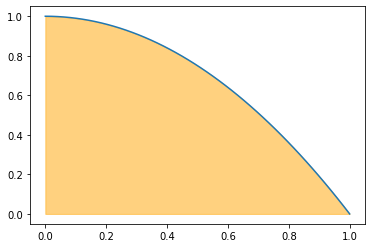

In [ ]:
x = np.linspace(0,1,50)
y = 1-pow(x,2)
plt.plot(x,y)

plt.fill_between(x,y, color = 'orange', alpha = 0.5)

In [ ]:
a = 0
b = 1
N = 11

h = (b-a)/(N-1)

x = np.linspace(a,b,N)

y = 1-pow(x,2)

I_trapecio = round(0.5*h*(sum(y[0:N-1]) + sum(y[1:N-1])),3)

In [ ]:
len(x)

11

In [ ]:
I_trapecio

0.665

In [ ]:
listaerrtr = []
listaN = []

for i in range(2,26):
  listaN.append(i)
  listaerrtr.append(abs(round(0.5*h*(sum(y[0:i-1]) + sum(y[1:i-1])),3)-0.667))

In [ ]:
len(listaN), len(listaerrtr)

(24, 24)

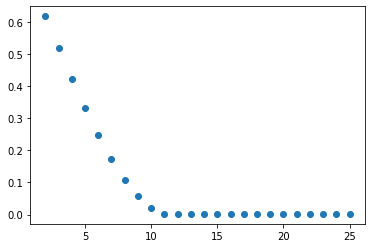

In [ ]:
plt.figure()
plt.scatter(listaN,listaerrtr)

Ejemplo con regla de Simpson:

In [ ]:
a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


#Ejercicio:

La velocidad de un cuerpo a lo largo de una línea recta es

\begin{equation}
v(t) = t^{3} + 4t^{2} + 2,
\end{equation}

con $[v]=\text{m/s}$ y $[t]=s$. Si $x(t=0) = 1.2\text{ m}$, 



1.   Encontrar el valor de la posición en $t=3\text{ s}$.
2.   Calcular el desplazamiento en $1.5\leq t\leq 2.5$ s.



Como es sabido, $v(t) = \frac{dx}{dt}$.

\begin{equation}
\int_{x_{0}}^{x} dx = \Delta x = \int_{0}^{t}(t^{3} + 4t^{2} + 2)dt
\end{equation}

Solución por regla del trapecio:

In [ ]:
t0 = 0
tf = 3

N1 = 81

hs1 = (tf-t0)/(N1-1)

intt1 = np.linspace(t0, tf, N1)

vel = pow(intt1,3) + 4*pow(intt1,2) + 2

Deltax_t = round(0.5*hs1*(sum(vel[0:N1-1]) + sum(vel[1:N1-1])),2)

In [ ]:
Deltax_t 

61.04

Solución por regla de Simpson:

In [ ]:
N2 = 81

hs2 = (tf-t0)/(N2-1)

intt2 = np.linspace(t0, tf, N2)

vel_2 = pow(intt2,3) + 4*pow(intt2,2) + 2

Deltax_s = (hs2/3)*(vel_2[0] + 2*sum(vel_2[:N2-2:2]) + 4*sum(vel_2[1:N2-1:2]) + vel_2[N2-1])

In [ ]:
Deltax_s 

62.3

Posición en $t=3$ s:

$\Delta x = \int_{t_{i}}^{t_{f}}v(t)dt= x(3) - x(0)$

$x(3) = x(0)+\int_{0}^{3}v(t)dt$

Por Trapecio: $x(3) = 1.2 + 62.15 = 63.35 \text{ m}$.

Por Simpson: $x(3) = 1.2 + 62.3 = 63.5\text{ m}$.

In [ ]:
1.2+62.15

63.35

In [ ]:
1.2+62.3

63.5

Desplazamiento en $1.5\leq t\leq 2.5$ s:

In [ ]:
t0 = 1.5
tf = 2.5

N1 = 81

hs1 = (tf-t0)/(N1-1)

intt1 = np.linspace(t0, tf, N1)

vel = pow(intt1,3) + 4*pow(intt1,2) + 2

Deltax_t1 = round(0.5*hs1*(sum(vel[0:N1-1]) + sum(vel[1:N1-1])),2)

In [ ]:
Deltax_t1

26.57